## Tarea IV - Herramientas Computacionales

$\textbf{Demuestre que la ecuación de Laplace en forma discreta toma la forma}$

$\psi(r,\theta) \approx g(r,\theta,\Delta r, \Delta \theta)\left( \frac{2}{(\Delta r)²} + \frac{1}{r \Delta r}+\frac{2}{r²(\Delta \theta)²}\right )^{-1}$

En donde $g(r,\theta,\Delta r, \Delta \theta)$ contiene información de $\psi$ evaluada en un entorno local al punto $(r,\theta)$. Es decir, está definida en términos de $\psi(r \pm \Delta r, \theta)$ y $\psi(r, \theta \pm \Delta \theta)$, también $r, \Delta r$ y $\Delta \theta$.

La ecuación de Laplace para $\psi(r,\theta)$ en coordenadas polares $(r,\theta)$ está dada por:

$\nabla^2\psi(r,\theta)=0,$

donde  

$\nabla^2\psi(r,\theta) =\frac{\partial^2\psi}{\partial r^2} +\frac{1}{r}\,\frac{\partial\psi}{\partial r} +\frac{1}{r^2}\,\frac{\partial^2\psi}{\partial\theta^2}$

Así pues, teniendo en cuenta que para valores pequeños de $\Delta r$ y $\Delta \theta$:

$\frac{\partial^2\psi(r,\theta)}{\partial r^2}\approx\frac{1}{(\Delta r)^2}\bigl[\psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta)-2\psi(r,\theta)\bigr]$

$\frac{\partial\psi(r,\theta)}{\partial r}\approx\frac{1}{\Delta r}\bigl[\psi(r+\Delta r,\theta)-\psi(r,\theta)\bigr]$

$\frac{\partial^2\psi(r,\theta)}{\partial \theta^2}\approx\frac{1}{(\Delta \theta)^2}\bigl[\psi(r,\theta+\Delta\theta)+\psi(r,\theta-\Delta\theta)-2\psi(r,\theta)\bigr]$

luego,

$\nabla^2\psi(r,\theta)\approx\frac{1}{(\Delta r)^2}\bigl[\psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta)-2\psi(r,\theta)\bigr] + \frac{1}{r}\frac{1}{\Delta r}\bigl[\psi(r+\Delta r,\theta)-\psi(r,\theta)\bigr] + \frac{1}{r²}\frac{1}{(\Delta \theta)^2}\bigl[\psi(r,\theta+\Delta\theta)+\psi(r,\theta-\Delta\theta)-2\psi(r,\theta)\bigr]\approx 0$

Por lo que $\psi(r,\theta)$ queda definida por:

$\psi(r,\theta) \approx \frac{1}{\left[\frac{2}{(\Delta r)²} + \frac{1}{r \Delta r} + \frac{2}{r² (\Delta \theta)²} \right ]}\frac{1}{(\Delta r)²} \left[ \psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta) \right] + \frac{1}{r \Delta r} \left[ \psi(r+\Delta r,\theta)\right] + \frac{1}{r² (\Delta \theta)²} \left[ \psi(r,\theta+\Delta\theta)+\psi(r,\theta-\Delta\theta) \right] $

De lo anterior se deduce que:

$g(r,\theta,\Delta r, \Delta \theta)=\frac{1}{(\Delta r)²} \left[ \psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta) \right] + \frac{1}{r \Delta r} \left[ \psi(r+\Delta r,\theta)\right] + \frac{1}{r² (\Delta \theta)²} \left[ \psi(r,\theta+\Delta\theta)+\psi(r,\theta-\Delta\theta) \right]$

## $\textbf{I}$.
#### A partir de la expresión obtenida para $g(r,\theta,\Delta r,\Delta \theta)$ itere varias veces $\psi(r,\theta)$ para calcular la solución numérica del problema con condiciones de frontera
$
\boxed{
\begin{aligned}
\nabla^2\psi(r,\theta)&=0,\\
\psi(r,\theta=0)&=0,\quad \psi(r,\theta=\pi)=150,\quad 0\le r\le4,\\
\psi(r=4,\theta)&=
\begin{cases}
150,&0\le\theta\le\tfrac{\pi}{2},\\
0,&\tfrac{\pi}{2}<\theta\le\pi.
\end{cases}
\end{aligned}
}
$

Grafique la solución en coordenadas polares utilizando valores pequeños de $\Delta r$ y $\Delta \theta$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

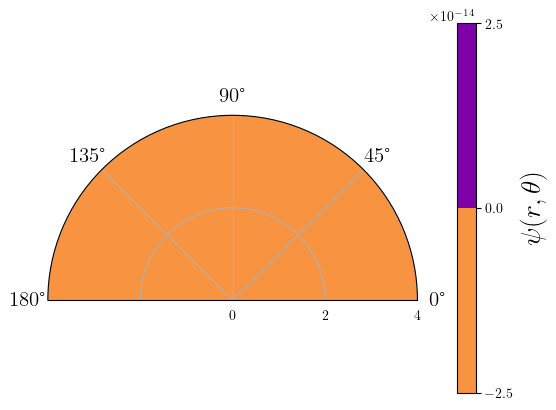

In [2]:
Delta_r = 0.1
Delta_theta = 0.1

a = np.arange(0,np.pi+Delta_theta,Delta_theta) #theta va de 0 a pi
b = np.arange(0,4+Delta_r,Delta_r) #r va de 0 a 4
A,B = np.meshgrid(a,b)
Psi_sol=np.zeros(A.shape)

#Plotting
ax = plt.subplot(111, polar=True)
ax.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_yticks([0,2,4])
ax.set_ylim(0,4)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=10) 
ctf = ax.contourf(a, b, Psi_sol, cmap=cm.plasma_r) 
plt.colorbar(ctf,pad=0.08).set_label(r'$\psi(r, \theta)$',fontsize=20)
plt.axis([0,np.pi,0,4])
plt.show()

In [3]:
#Elemento de matriz en el que está Pi/2:
i=int(len(A[0])/2)
print(i)

16


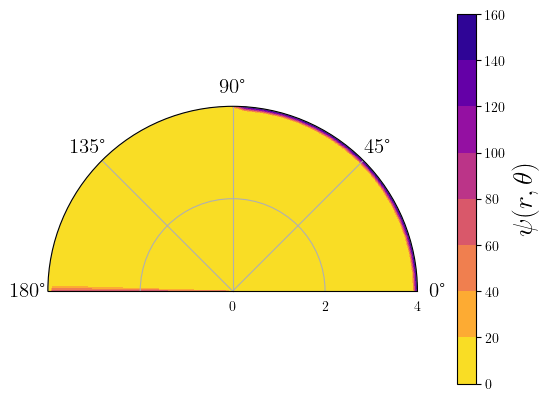

In [4]:
#Condiciones de frontera
Psi_sol[::,0]=0 #para todo r, con theta=0, Psi=0
Psi_sol[::,-1]=150 #para todo r, con theta=pi, Psi=150
Psi_sol[-1,:i+1]=150 #para r=4, 0<=theta<=pi/2, Psi=150
Psi_sol[-1,i:]=0 #para r=4, pi/2<=theta=<pi, Psi=0

#Plotting
ax = plt.subplot(111, polar=True)
ax.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_yticks([0,2,4])
ax.set_ylim(0,4)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=10) 
ctf = ax.contourf(a, b, Psi_sol, cmap=cm.plasma_r) 
plt.colorbar(ctf,pad=0.08).set_label(r'$\psi(r, \theta)$',fontsize=20)
plt.axis([0,np.pi,0,4])
plt.show()

In [5]:
#Iterando psi y verificando que sí es la solución
Error=[]
for n in range(10000):
    Psi_new=np.copy(Psi_sol)
    n1, n2 = Psi_sol.shape
    for i in range(1,n1-1):
        for j in range(1,n2-1): 
            r=i*Delta_r
            f=(2.0/Delta_r**2)+(1.0/(r*Delta_r))+(2.0/((r**2)*Delta_theta**2))
            g1=(1.0/Delta_r**2)*(Psi_sol[i+1][j]+Psi_sol[i-1][j])
            g2=(1.0/(r*Delta_r))*Psi_sol[i+1][j]
            g3=(1.0/((r**2)*Delta_theta**2))*(Psi_sol[i,j+1]+Psi_sol[i][j-1])
            Psi_new[i][j]=(1.0/f)*(g1+g2+g3)
    Error.append(np.mean(np.abs(Psi_new-Psi_sol).flatten()))        
    Psi_sol=Psi_new

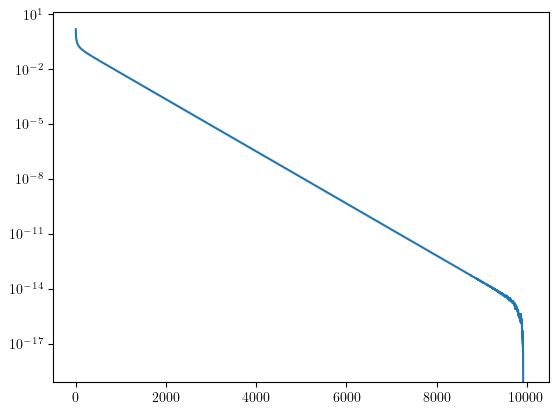

In [6]:
#Plotting error
plt.semilogy(Error)
plt.show()

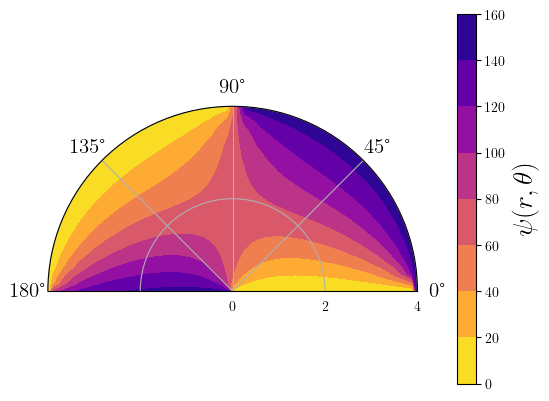

In [7]:
#Plotting in polar coordinates
ax = plt.subplot(111, polar=True)
ax.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_yticks([0,2,4])
ax.set_ylim(0,4)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=10) 
ctf = ax.contourf(a, b, Psi_sol, cmap=cm.plasma_r) 
plt.colorbar(ctf,pad=0.08).set_label(r'$\psi(r, \theta)$',fontsize=20)
plt.axis([0,np.pi,0,4])
plt.show()

## $\textbf{II}$.
#### Ahora cambie las condiciones utilizadas en $\textbf{I}$ incluyendo valores $\psi(r,\theta)$ en la frontera que puedan depender de $r$ o $\theta$. Grafique la solución obtenida en coordenadas polares.

In [8]:
i1=int(6*len(A[0])/7) #Elemento de matriz en el que está 6Pi/7

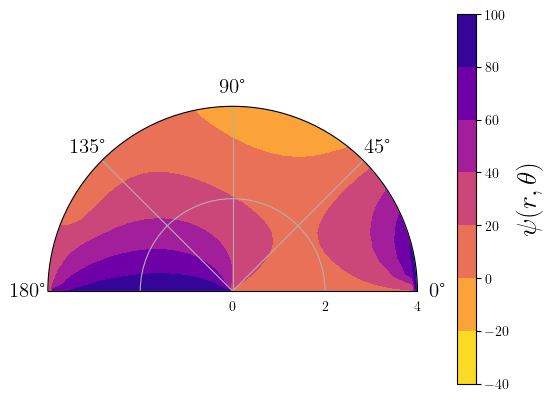

In [10]:
#Condiciones de frontera
Psi_sol=np.zeros(A.shape)
r_=np.linspace(0,4,A.shape[0])
theta_=np.linspace(0,np.pi,29)
Psi_sol[::,0]=7+r_+0.4*r_**2
Psi_sol[::,-1]=100 
Psi_sol[-1,:i1+1]=93*np.sinc(theta_)
Psi_sol[-1,i1:]=26

for n in range(10000):
    Psi_new=np.copy(Psi_sol)
    n1, n2 = Psi_sol.shape
    for i in range(1,n1-1):
        for j in range(1,n2-1): 
            r=i*Delta_r
            f=(2.0/Delta_r**2)+(1.0/(r*Delta_r))+(2.0/((r**2)*Delta_theta**2))
            g1=(1.0/Delta_r**2)*(Psi_sol[i+1][j]+Psi_sol[i-1][j])
            g2=(1.0/(r*Delta_r))*Psi_sol[i+1][j]
            g3=(1.0/((r**2)*Delta_theta**2))*(Psi_sol[i,j+1]+Psi_sol[i][j-1])
            Psi_new[i][j]=(1.0/f)*(g1+g2+g3)        
    Psi_sol=Psi_new

ax = plt.subplot(111, polar=True)
ax.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_yticks([0,2,4])
ax.set_ylim(0,4)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=10) 
ctf = ax.contourf(a, b, Psi_sol, cmap=cm.plasma_r) 
plt.colorbar(ctf,pad=0.08).set_label(r'$\psi(r, \theta)$',fontsize=20)
plt.axis([0,np.pi,0,4])
plt.show()